In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
import statsmodels.api as sm
import os
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import binom_test

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from helpers import *

mypal = make_aesthetic(with_gridlines=False)

Solar panel data


/var/folders/gc/36c2knv139jfg23x561mj5xr0000gp/T/ipykernel_60079/4268021860.py:68: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  ax = sns.barplot(x='clean_choice', y='proportion', data=choice_counts, hue='clean_choice', palette=mypal, width=0.4)


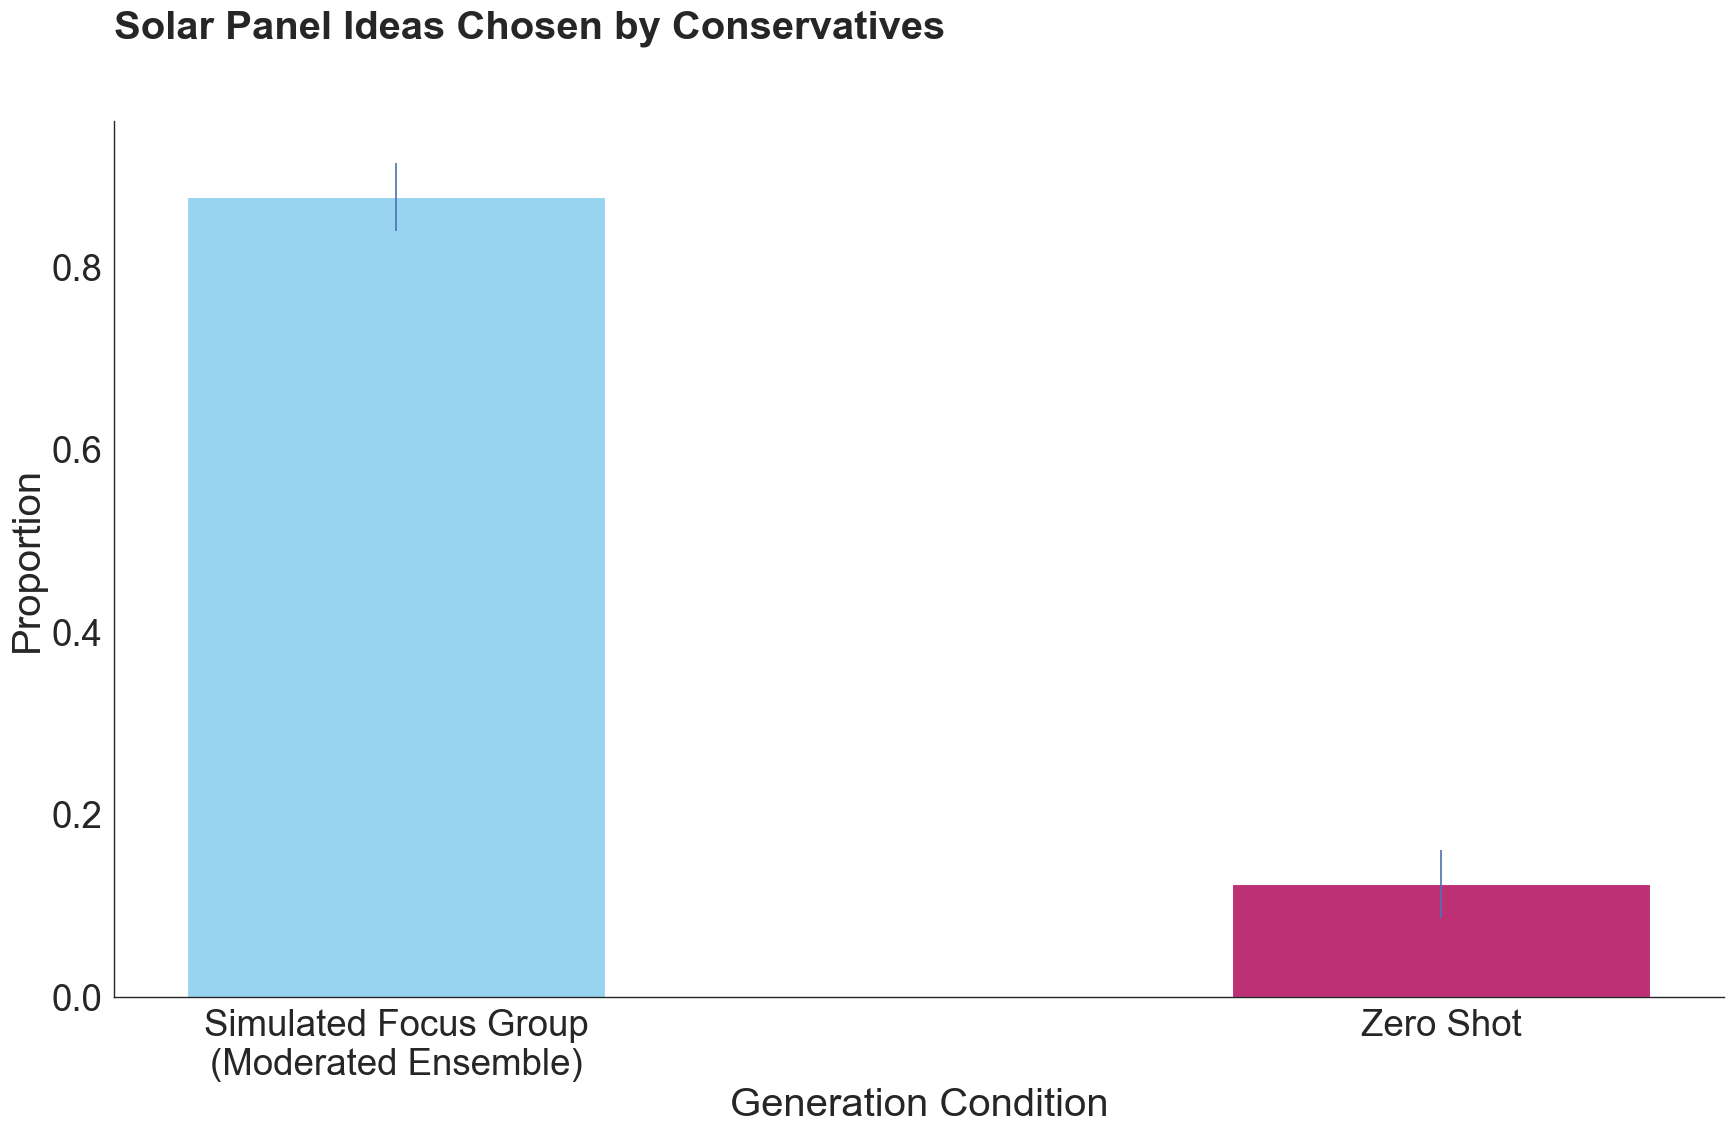

88\% (95\% CI = [84\%, 91\%])
Binomial $p = 0.0006547962565959734
School data


/var/folders/gc/36c2knv139jfg23x561mj5xr0000gp/T/ipykernel_60079/4268021860.py:68: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  ax = sns.barplot(x='clean_choice', y='proportion', data=choice_counts, hue='clean_choice', palette=mypal, width=0.4)


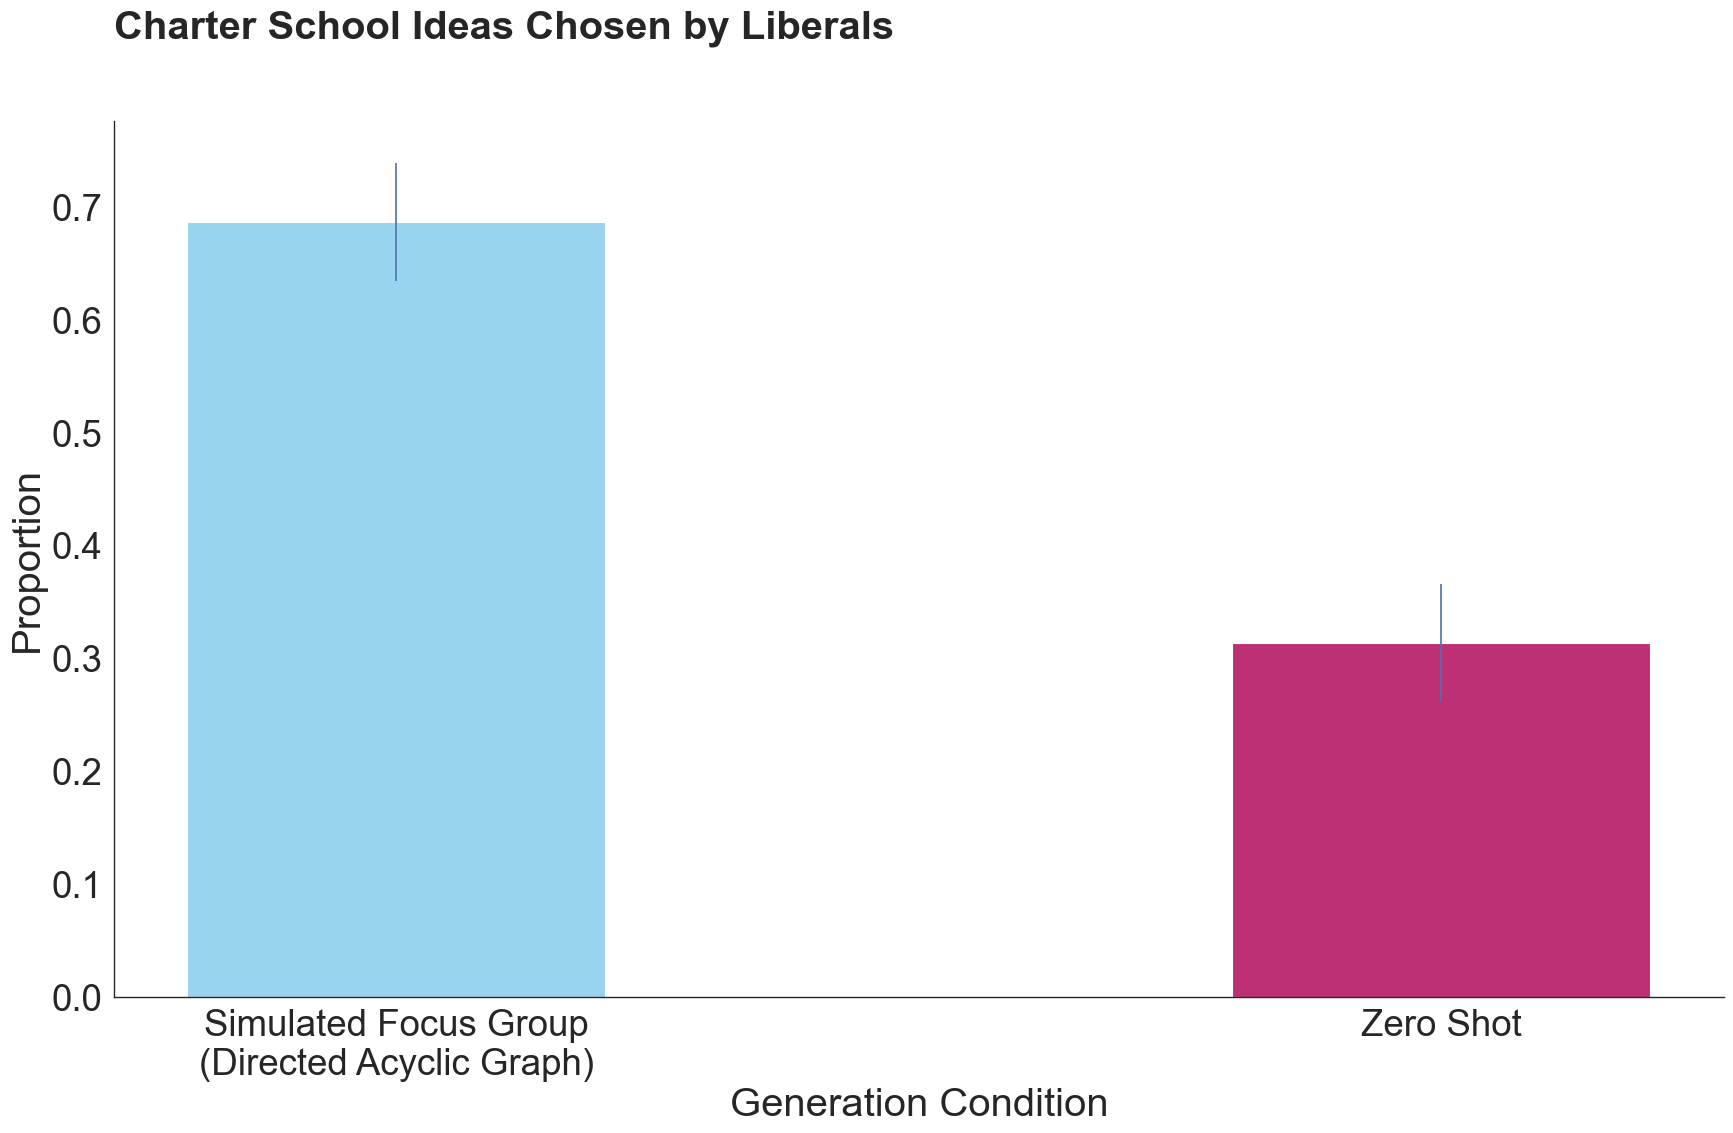

69\% (95\% CI = [63\%, 74\%])
Binomial $p = 3.2816933555406687e-06
Housing data


/var/folders/gc/36c2knv139jfg23x561mj5xr0000gp/T/ipykernel_60079/4268021860.py:68: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  ax = sns.barplot(x='clean_choice', y='proportion', data=choice_counts, hue='clean_choice', palette=mypal, width=0.4)


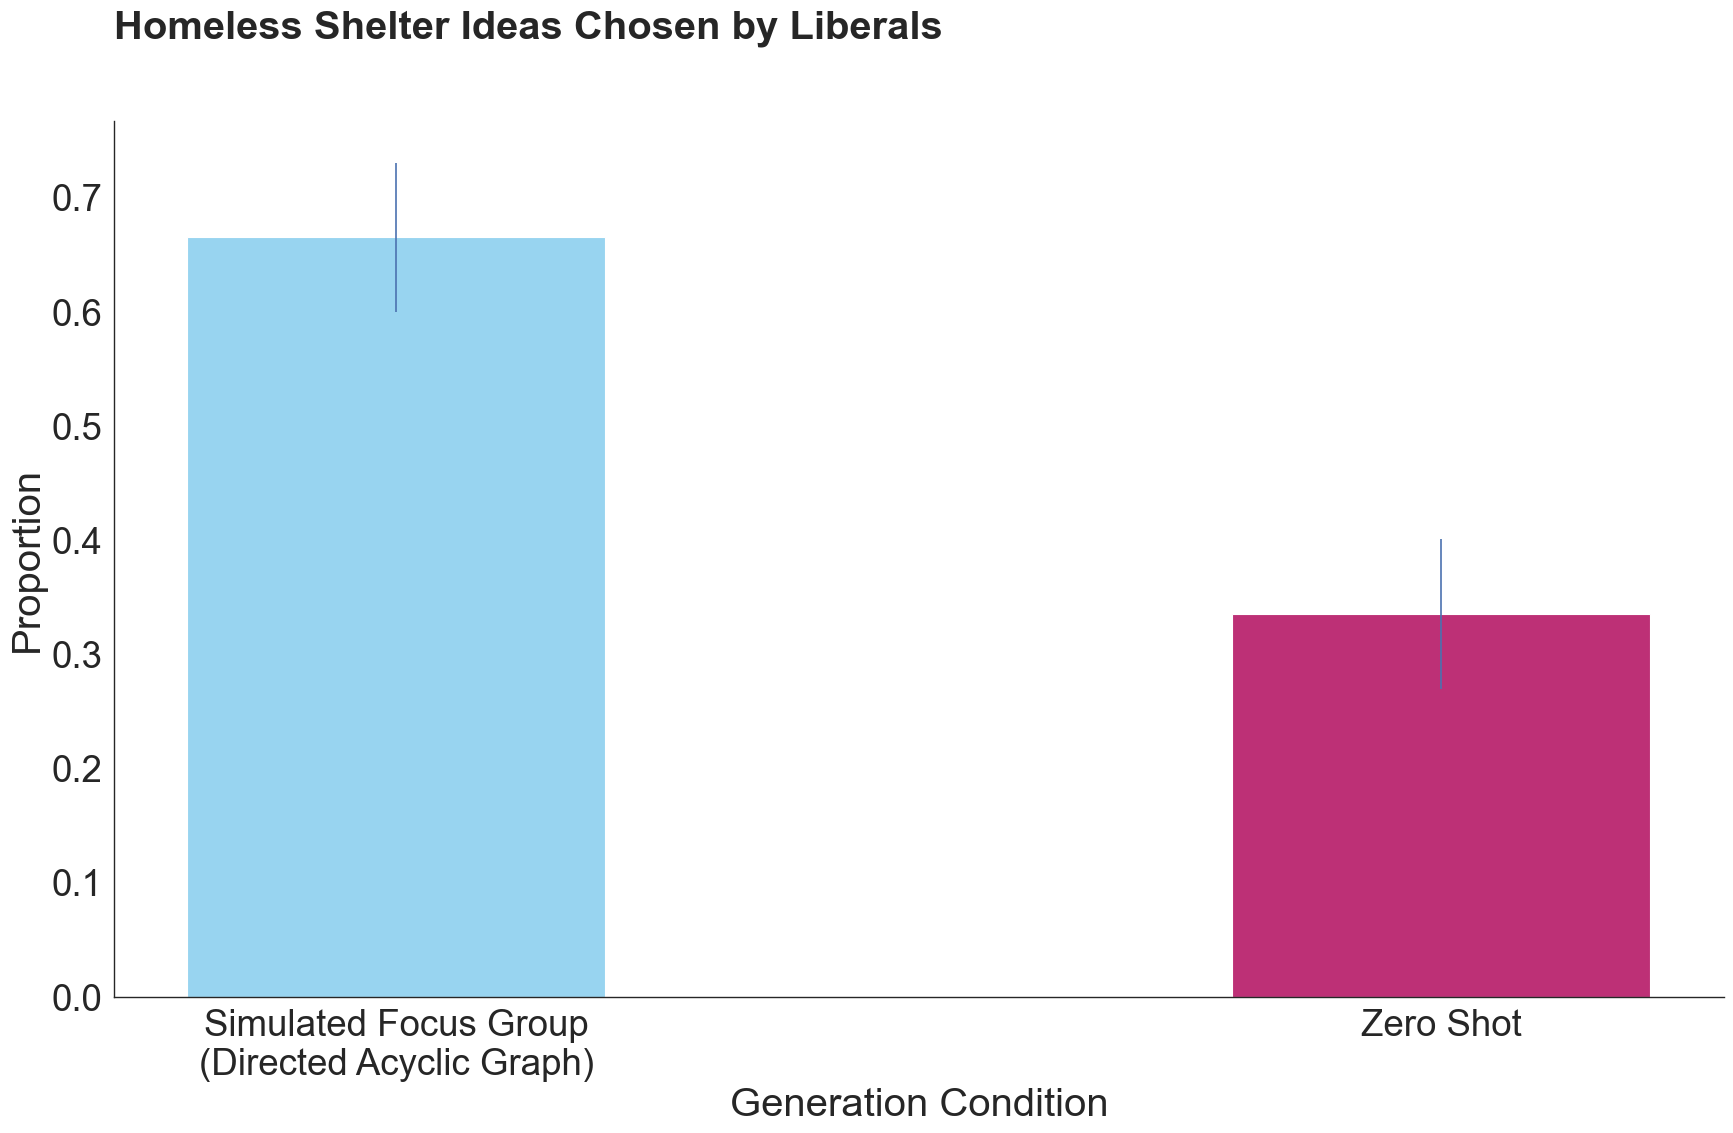

66\% (95\% CI = [60\%, 73\%])
Binomial $p = 7.780581762607018e-06
All data
78\% (95\% CI = [75\%, 81\%])
Binomial $p = 0.26163812169541745


In [2]:

def create_data_dict():

    data_dict = {
        'solar':pd.read_csv('../data/processed/clean_solar_data.csv'),
        'school':pd.read_csv('../data/processed/clean_school_data.csv'),
        'housing': pd.read_csv('../data/processed/clean_housing_data.csv')
    }

    data_dict['solar']['ideology'] = 'conservative'
    data_dict['solar']['domain'] = 'solar'
    data_dict['solar']['study'] = "Conservatives - Solar Panels"

    data_dict['school']['ideology'] = 'liberal'
    data_dict['school']['domain'] = 'school'
    data_dict['school']['study'] = "Liberals - Charter Schools"
    
    data_dict['housing']['ideology'] = 'liberal'
    data_dict['housing']['domain'] = 'housing'
    data_dict['housing']['study'] = 'Liberals - Housing'
    return data_dict

def merge_data(data_dict):
    joint_cols = ['ideology', 'choice', 'focus_chosen', 'clean_choice', 'domain', 'study']

    merged = pd.concat([data_dict['solar'][joint_cols],
                        data_dict['school'][joint_cols]], 
                        ignore_index=True)
    return merged


def print_ci(x):
    n = len(x)
    count = x.sum()
    lower, upper = proportion_confint(count=count, nobs=n, alpha=0.05)
    p = binom_test(count, n, 0.8)
    
    # Convert to percentages and format for LaTeX
    percent = count/n * 100
    lower_percent = lower * 100
    upper_percent = upper * 100
    
    print(f"{round(percent)}\\% (95\\% CI = [{round(lower_percent)}\\%, {round(upper_percent)}\\%])")
    print(f"Binomial $p = {p}")

def seperate_barplot(df, title, filename):
    """
    Makes a barplot of the proportion of each choice in the dataframe and saves to filename. 

    Args:
        df: pandas DataFrame
        title: str
        filename: str
    Returns 
        ax 
    """
    choice_counts = df['clean_choice'].value_counts().reset_index(name='count')
    choice_counts['proportion'] = choice_counts['count'] / len(df)
    n = len(df)

    choice_counts['ci_lower'], choice_counts['ci_upper'] = zip(*[
        sm.stats.proportion_confint(count, n, alpha=0.05)
        for count in choice_counts['count']
    ])

    # Plotting
    make_aesthetic(font_scale=3)
    plt.figure(figsize=(18, 12))
    ax = sns.barplot(x='clean_choice', y='proportion', data=choice_counts, hue='clean_choice', palette=mypal, width=0.4)
    plt.errorbar(x=choice_counts.index, y=choice_counts['proportion'],
                 yerr=[choice_counts['proportion'] - choice_counts['ci_lower'], 
                       choice_counts['ci_upper'] - choice_counts['proportion']], 
                 fmt='none', c='b')
    plt.xticks(rotation=0)
    plt.title(title, fontweight='bold')
    plt.ylabel('Proportion')
    plt.xlabel('Generation Condition')
    plt.savefig(f'../plots/{filename}.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    return ax


data_dict = create_data_dict()
merged = merge_data(data_dict)

print("Solar panel data")
solar_bp = seperate_barplot(data_dict['solar'], 'Solar Panel Ideas Chosen by Conservatives', 'solar_panel')
print_ci(data_dict['solar']['focus_chosen'])

print("======"*10)

print("School data")
school_bp = seperate_barplot(data_dict['school'], 'Charter School Ideas Chosen by Liberals', 'school')
print_ci(data_dict['school']['focus_chosen'])

print("Housing data")
housing_bp = seperate_barplot(data_dict['housing'], 'Homeless Shelter Ideas Chosen by Liberals', 'school')
print_ci(data_dict['housing']['focus_chosen'])


print("All data")
print_ci(merged['focus_chosen'])
